# **Manejo de Datos (Data Wrangling)**  

## **Objetivos**  
Al completar esta practica, serás capaz de:  

- Manejar valores ausentes en los datos.  
- Corregir el formato de los datos.  
- Estandarizar y normalizar datos.  


# **Tabla de contenidos**  

1. **Identificación y manejo de valores ausentes**  
   - Identificar valores ausentes  
   - Manejo de valores ausentes  

2. **Corrección del formato de datos**  

3. **Estandarización de datos**  

4. **Normalización de datos (centrado y escalado)**  

5. **Agrupamiento en intervalos (Binning)**  

6. **Variables indicadoras**  


# **¿Cuál es el propósito del manejo de datos (Data Wrangling)?**  

El manejo de datos se utiliza para convertir los datos desde un formato inicial a un formato más adecuado para el análisis.  

## **¿Cuál es la tasa de consumo de combustible (L/100 km) para un automóvil diésel?**  

(Se analizarán los datos para responder esta pregunta).  

---

## **Importación de datos**  
Puedes encontrar el conjunto de datos "Automobile Dataset" en el siguiente enlace:  
[Automobile Dataset](https://drive.google.com/file/d/1D1z3utAy7x-sMzn0JYC8aI-kBriSssSb/view?usp=sharing)  


## **Importación de librerías necesarias**  

Para trabajar con el conjunto de datos, primero debemos importar las librerías esenciales:  




In [ ]:
# Importamos las librerías necesarias
import pandas as pd  # Para manipulación y análisis de datos
import matplotlib.pylab as plt  # Para generación de gráficos y visualización de datos
import numpy as np

In [ ]:
# Importamos la librería gdown para descargar archivos desde Google Drive
import gdown

## **Lectura del conjunto de datos desde la URL**  

A continuación, utilizaremos funciones para descargar el conjunto de datos directamente desde la URL y agregar los encabezados correspondientes.  

In [ ]:
# Definimos la URL del archivo en Google Drive (ID del archivo)
file_id = "1D1z3utAy7x-sMzn0JYC8aI-kBriSssSb"
url = f"https://drive.google.com/uc?id={file_id}"

# Definimos el nombre del archivo a guardar localmente
output = "automobile.csv"

# Descargamos el archivo
gdown.download(url, output, quiet=False)

# Verificamos que el archivo se ha descargado correctamente
import pandas as pd
df = pd.read_csv(output)

# Mostramos las primeras filas del DataFrame
df.head()

Downloading...
From: https://drive.google.com/uc?id=1D1z3utAy7x-sMzn0JYC8aI-kBriSssSb
To: /content/automobile.csv
100%|██████████| 25.9k/25.9k [00:00<00:00, 39.2MB/s]


,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


## **Crear una Lista de Encabezados en Python**  

A continuación, creamos una lista llamada `headers` que contiene los nombres de los encabezados del conjunto de datos.   


In [ ]:
# Lista de los encabezados del conjunto de datos en español
encabezados = [
    "simbolismo", "pérdidas-normalizadas", "marca", "tipo-de-combustible", "aspiración",
    "número-de-puertas", "estilo-de-carrocería", "ruedas-motrices", "ubicación-del-motor",
    "distancia-entre-ejes", "longitud", "ancho", "altura", "peso-en-vacío",
    "tipo-de-motor", "número-de-cilindros", "tamaño-del-motor", "sistema-de-combustible",
    "diámetro", "recorrido", "relación-de-compresión", "caballos-de-fuerza", "rpm-pico",
    "mpg-ciudad", "mpg-carretera", "precio"
]

# Mostramos la lista de encabezados en español
print(encabezados)

['simbolismo', 'pérdidas-normalizadas', 'marca', 'tipo-de-combustible', 'aspiración', 'número-de-puertas', 'estilo-de-carrocería', 'ruedas-motrices', 'ubicación-del-motor', 'distancia-entre-ejes', 'longitud', 'ancho', 'altura', 'peso-en-vacío', 'tipo-de-motor', 'número-de-cilindros', 'tamaño-del-motor', 'sistema-de-combustible', 'diámetro', 'recorrido', 'relación-de-compresión', 'caballos-de-fuerza', 'rpm-pico', 'mpg-ciudad', 'mpg-carretera', 'precio']


## **Cargar los datos desde la URL con Pandas y asignar los encabezados**  

Usamos el método `read_csv()` de Pandas para cargar el conjunto de datos desde la URL, y asignamos la lista `headers` a los nombres de las columnas utilizando el parámetro `names`.  


In [ ]:
# Cargamos los datos desde la URL con los nombres de las columnas especificados
df = pd.read_csv(file_path, names=encabezados)

# Mostramos las primeras filas del DataFrame para verificar que se cargó correctamente
df.head()

,simbolismo,pérdidas-normalizadas,marca,tipo-de-combustible,aspiración,número-de-puertas,estilo-de-carrocería,ruedas-motrices,ubicación-del-motor,distancia-entre-ejes,...,tamaño-del-motor,sistema-de-combustible,diámetro,recorrido,relación-de-compresión,caballos-de-fuerza,rpm-pico,mpg-ciudad,mpg-carretera,precio
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


## **Cómo trabajar con datos faltantes**  

Al observar el DataFrame, es posible que hayan aparecido varios signos de interrogación (?). Estos valores faltantes pueden dificultar el análisis posterior.  

¿Cómo podemos identificar y manejar esos valores faltantes?  

### **Pasos para trabajar con datos faltantes**  

1. **Identificar los datos faltantes**  
   Podemos utilizar las funciones de Pandas para identificar los valores faltantes en nuestro conjunto de datos.  

2. **Manejar los datos faltantes**  
   Dependiendo de la naturaleza de los datos faltantes, podemos optar por eliminarlos, reemplazarlos por un valor específico o aplicar una estrategia de imputación.  

3. **Corregir el formato de los datos**  
   Una vez que los valores faltantes han sido manejados, es importante asegurarse de que todos los datos estén en el formato adecuado para su análisis.  

### **Identificación de datos faltantes**  

Para identificar los valores faltantes en un DataFrame, usamos el método `isnull()` y `sum()`. Esto nos dará el número de valores faltantes por columna.  




In [ ]:
# Identificar los valores faltantes en el DataFrame
faltantes = df.isnull().sum()

# Mostrar la cantidad de valores faltantes por columna
print(faltantes)

simbolismo                0
pérdidas-normalizadas     0
marca                     0
tipo-de-combustible       0
aspiración                0
número-de-puertas         0
estilo-de-carrocería      0
ruedas-motrices           0
ubicación-del-motor       0
distancia-entre-ejes      0
longitud                  0
ancho                     0
altura                    0
peso-en-vacío             0
tipo-de-motor             0
número-de-cilindros       0
tamaño-del-motor          0
sistema-de-combustible    0
diámetro                  0
recorrido                 0
relación-de-compresión    0
caballos-de-fuerza        0
rpm-pico                  0
mpg-ciudad                0
mpg-carretera             0
precio                    0
dtype: int64


## **Identificar y manejar los valores faltantes**  

### **Identificación de valores faltantes**  
En el conjunto de datos de los automóviles, los valores faltantes están representados por el signo de interrogación (`?`). Para poder manejarlos correctamente, debemos reemplazar los `?` por `NaN` (Not a Number), que es el marcador por defecto para los valores faltantes en Python.  

### **Reemplazar "?" por NaN**  
Podemos utilizar el método `.replace(A, B, inplace=True)` de Pandas para reemplazar todos los signos de interrogación (`?`) por `NaN`. Esto se hace de la siguiente manera:



In [ ]:
# Reemplazar los signos de interrogación "?" por NaN
df.replace("?", pd.NA, inplace=True)

# Verificar los cambios
print(df.isnull().sum())  # Mostrar la cantidad de valores faltantes por columna

simbolismo                 0
pérdidas-normalizadas     41
marca                      0
tipo-de-combustible        0
aspiración                 0
número-de-puertas          2
estilo-de-carrocería       0
ruedas-motrices            0
ubicación-del-motor        0
distancia-entre-ejes       0
longitud                   0
ancho                      0
altura                     0
peso-en-vacío              0
tipo-de-motor              0
número-de-cilindros        0
tamaño-del-motor           0
sistema-de-combustible     0
diámetro                   4
recorrido                  4
relación-de-compresión     0
caballos-de-fuerza         2
rpm-pico                   2
mpg-ciudad                 0
mpg-carretera              0
precio                     4
dtype: int64


## **Reemplazar NaN en la columna "recorrido" con la media**    

Primero, nos aseguramos de convertir los valores no numéricos y los `NaN` a un tipo que podamos procesar. Luego, calculamos la media y reemplazamos los `NaN` con esa media.


In [ ]:
# Convertir la columna "recorrido" a tipo numérico, forzando los errores a NaN
df["recorrido"] = pd.to_numeric(df["recorrido"], errors='coerce')

# Calcular la media de la columna "recorrido"
avg_recorrido = df["recorrido"].mean()
print("Promedio de recorrido:", avg_recorrido)

# Reemplazar los NaN por el valor medio en la columna "recorrido"
df["recorrido"] = df["recorrido"].fillna(avg_recorrido)

# Verificar si los NaN han sido reemplazados
print(df["recorrido"].isnull().sum())

Promedio de recorrido: 3.2554228855721394
0


In [ ]:
# Convertir la columna "caballos-de-fuerza" a numérico, forzando los errores a NaN
df["caballos-de-fuerza"] = pd.to_numeric(df["caballos-de-fuerza"], errors='coerce')

# Calcular la media de la columna "caballos-de-fuerza"
avg_caballos_de_fuerza = df["caballos-de-fuerza"].mean()
print("Promedio de caballos de fuerza:", avg_caballos_de_fuerza)

Promedio de caballos de fuerza: 104.25615763546799


In [ ]:
# Reemplazar los NaN con el valor medio en la columna "caballos-de-fuerza"
df["caballos-de-fuerza"] = df["caballos-de-fuerza"].fillna(avg_caballos_de_fuerza)

# Verificar si los NaN han sido reemplazados
print(df["caballos-de-fuerza"].isnull().sum())

0


In [ ]:
# Convertir la columna "rpm-pico" a numérico, forzando los errores a NaN
df["rpm-pico"] = pd.to_numeric(df["rpm-pico"], errors='coerce')

# Calcular la media de la columna "rpm-pico"
avg_rpm_pico = df["rpm-pico"].mean()
print("Promedio de revoluciones por minuto pico:", avg_rpm_pico)

Promedio de revoluciones por minuto pico: 5125.369458128079


In [ ]:
# Reemplazar los NaN con el valor medio en la columna "rpm-pico"
df["rpm-pico"] = df["rpm-pico"].fillna(avg_rpm_pico)

# Verificar si los NaN han sido reemplazados
print(df["rpm-pico"].isnull().sum())

0


In [ ]:
# Ver los valores únicos y sus frecuencias en la columna "rpm-pico"
print(df["rpm-pico"].value_counts())

rpm-pico
5500.000000    37
4800.000000    36
5000.000000    27
5200.000000    23
5400.000000    13
6000.000000     9
5250.000000     7
4500.000000     7
5800.000000     7
4200.000000     5
4150.000000     5
4750.000000     4
4350.000000     4
5100.000000     3
4250.000000     3
5900.000000     3
4400.000000     3
5125.369458     2
6600.000000     2
4650.000000     1
5600.000000     1
5750.000000     1
4900.000000     1
5300.000000     1
Name: count, dtype: int64


In [ ]:
# Encontrar el valor más común en la columna "número-de-puertas"
most_common_doors = df["número-de-puertas"].value_counts().idxmax()

# Imprimir el tipo de puerta más común
print("El tipo de puerta más común es:", most_common_doors)

El tipo de puerta más común es: four


In [ ]:
# Reemplazar el valor más común en la columna "número-de-puertas" por un nuevo valor
df["número-de-puertas"] = df["número-de-puertas"].replace(most_common_doors, "nuevo_valor")

# Verificar los cambios
print(df["número-de-puertas"].value_counts())

número-de-puertas
nuevo_valor    114
two             89
Name: count, dtype: int64


In [ ]:
# Eliminar las filas que no tienen datos en la columna "precio"
df = df.dropna(subset=["precio"])

# Verificar que las filas sin precio hayan sido eliminadas
print(df.isnull().sum())

simbolismo                 0
pérdidas-normalizadas     37
marca                      0
tipo-de-combustible        0
aspiración                 0
número-de-puertas          2
estilo-de-carrocería       0
ruedas-motrices            0
ubicación-del-motor        0
distancia-entre-ejes       0
longitud                   0
ancho                      0
altura                     0
peso-en-vacío              0
tipo-de-motor              0
número-de-cilindros        0
tamaño-del-motor           0
sistema-de-combustible     0
diámetro                   4
recorrido                  0
relación-de-compresión     0
caballos-de-fuerza         0
rpm-pico                   0
mpg-ciudad                 0
mpg-carretera              0
precio                     0
dtype: int64


¡Genial! Ahora que hemoss limpiado el conjunto de datos y eliminado los valores faltantes, tenemos un DataFrame con datos completos y listos para el análisis.

Para verificar los tipos de datos de cada columna en tu DataFrame, puedes usar el atributo `.dtypes`. Esto te dará una visión general de qué tipo de datos está manejando cada columna.

In [ ]:
# Verificar los tipos de datos de cada columna
print(df.dtypes)

simbolismo                  int64
pérdidas-normalizadas      object
marca                      object
tipo-de-combustible        object
aspiración                 object
número-de-puertas          object
estilo-de-carrocería       object
ruedas-motrices            object
ubicación-del-motor        object
distancia-entre-ejes      float64
longitud                  float64
ancho                     float64
altura                    float64
peso-en-vacío               int64
tipo-de-motor              object
número-de-cilindros        object
tamaño-del-motor            int64
sistema-de-combustible     object
diámetro                   object
recorrido                 float64
relación-de-compresión    float64
caballos-de-fuerza        float64
rpm-pico                  float64
mpg-ciudad                  int64
mpg-carretera               int64
precio                     object
dtype: object


**¿Y qué pasa si necesitas cambiar el tipo de dato?**

Si encuentras que alguna columna no tiene el tipo adecuado (por ejemplo, si una columna que debería ser numérica está como object o string), puedes cambiar su tipo utilizando `.astype()`.

In [ ]:
# Convertir "pérdidas-normalizadas" a tipo float usando .loc
df.loc[:, "pérdidas-normalizadas"] = pd.to_numeric(df["pérdidas-normalizadas"], errors="coerce")

# Convertir "precio" a tipo float usando .loc
df.loc[:, "precio"] = pd.to_numeric(df["precio"], errors="coerce")

# Convertir "diámetro" a tipo float usando .loc
df.loc[:, "diámetro"] = pd.to_numeric(df["diámetro"], errors="coerce")

# Convertir "número-de-puertas" a tipo categoría usando .loc
df.loc[:, "número-de-puertas"] = df["número-de-puertas"].astype("category")

# Convertir "número-de-cilindros" a tipo entero usando .loc
df.loc[:, "número-de-cilindros"] = pd.to_numeric(df["número-de-cilindros"], errors="coerce", downcast="integer")

In [ ]:
# Verificar los tipos de datos de las columnas después de la conversión
print(df.dtypes)

simbolismo                   int64
pérdidas-normalizadas      float64
marca                       object
tipo-de-combustible         object
aspiración                  object
número-de-puertas         category
estilo-de-carrocería        object
ruedas-motrices             object
ubicación-del-motor         object
distancia-entre-ejes       float64
longitud                   float64
ancho                      float64
altura                     float64
peso-en-vacío                int64
tipo-de-motor               object
número-de-cilindros        float64
tamaño-del-motor             int64
sistema-de-combustible      object
diámetro                   float64
recorrido                  float64
relación-de-compresión     float64
caballos-de-fuerza         float64
rpm-pico                   float64
mpg-ciudad                   int64
mpg-carretera                int64
precio                     float64
dtype: object


**¡Genial!**

Ahora tienes el conjunto de datos limpio, sin valores faltantes y con todos los datos en su formato adecuado. Este es un paso clave para cualquier análisis o modelado de datos, ya que un conjunto de datos bien preparado es fundamental para obtener resultados precisos y confiables.

## Estandarización de datos

La estandarización de datos es un proceso crucial cuando se recopilan datos de diferentes fuentes con distintos formatos. En este caso, la estandarización se refiere a la transformación de los datos en un formato común para que se puedan realizar comparaciones significativas.

### ¿Qué es la estandarización?
La estandarización es el proceso de transformar los datos a una escala común, lo que permite que el investigador haga comparaciones significativas. En el contexto de datos numéricos, esto podría implicar transformar las características para que tengan una media de 0 y una desviación estándar de 1.

### Ejemplo: Transformación de consumo de combustible (mpg a L/100km)
En tu conjunto de datos, las columnas de consumo de combustible "mpg-ciudad" y "mpg-carretera" están representadas en la unidad de mpg (millas por galón). Supón que estás desarrollando una aplicación en un país que usa la unidad L/100km (litros por 100 kilómetros) para el consumo de combustible.

La fórmula de conversión es la siguiente:

L/100km = 235

### Implementación en Pandas
Podemos aplicar esta conversión a las columnas correspondientes directamente utilizando Pandas. Aquí te dejo un ejemplo de cómo hacerlo:


In [ ]:
# Asegúrate de que la columna "mpg-ciudad" existe antes de proceder
if "mpg-ciudad" in df.columns:
    # Transformar "mpg-ciudad" a L/100km mediante una operación matemática
    df["mpg-ciudad"] = 235 / df["mpg-ciudad"]

    # Verificar los datos transformados
    print(df.head())
else:
    print("La columna 'mpg-ciudad' no existe en el DataFrame.")

   simbolismo  pérdidas-normalizadas        marca tipo-de-combustible  \
0           3                    NaN  alfa-romero                 gas   
1           3                    NaN  alfa-romero                 gas   
2           1                    NaN  alfa-romero                 gas   
3           2                  164.0         audi                 gas   
4           2                  164.0         audi                 gas   

  aspiración número-de-puertas estilo-de-carrocería ruedas-motrices  \
0        std               two          convertible             rwd   
1        std               two          convertible             rwd   
2        std               two            hatchback             rwd   
3        std       nuevo_valor                sedan             fwd   
4        std       nuevo_valor                sedan             4wd   

  ubicación-del-motor  distancia-entre-ejes  ...  tamaño-del-motor  \
0               front                  88.6  ...               1

<ipython-input-49-cdf8a7d03f89>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["mpg-ciudad"] = 235 / df["mpg-ciudad"]


### **Normalización de Datos**
**¿Por qué normalizar?**

La normalización es el proceso de transformar los valores de varias variables a un rango similar. Las normalizaciones típicas incluyen:

Escalar la variable de manera que el promedio de la variable sea 0.
Escalar la variable de manera que la varianza sea 1.
Escalar la variable de manera que los valores de la variable estén en el rango de 0 a 1.
***Ejemplo***

Para demostrar la normalización, supongamos que queremos escalar las columnas "longitud", "ancho" y "altura".

Objetivo: normalizar esas variables para que sus valores estén en el rango de 0 a 1.

Enfoque: reemplazar el valor original por:

`valor original/valor maximo`


In [ ]:
# Normalización de las columnas "longitud", "ancho", y "altura" para que sus valores estén entre 0 y 1

# Normalizar la columna 'longitud'
df.loc[:, "longitud"] = df["longitud"] / df["longitud"].max()

# Normalizar la columna 'ancho'
df.loc[:, "ancho"] = df["ancho"] / df["ancho"].max()

# Normalizar la columna 'altura'
df.loc[:, "altura"] = df["altura"] / df["altura"].max()

# Verificar las primeras filas después de la normalización
df.head()


,simbolismo,pérdidas-normalizadas,marca,tipo-de-combustible,aspiración,número-de-puertas,estilo-de-carrocería,ruedas-motrices,ubicación-del-motor,distancia-entre-ejes,...,tamaño-del-motor,sistema-de-combustible,diámetro,recorrido,relación-de-compresión,caballos-de-fuerza,rpm-pico,mpg-ciudad,carretera-L/100km,precio
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,11.190476,8.703704,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,11.190476,8.703704,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,12.368421,9.038462,16500.0
3,2,164.0,audi,gas,std,nuevo_valor,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,9.791667,7.833333,13950.0
4,2,164.0,audi,gas,std,nuevo_valor,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,13.055556,10.681818,17450.0


In [ ]:
# Normalizar la columna 'altura' para que sus valores estén entre 0 y 1
df.loc[:, "altura"] = df["altura"] / df["altura"].max()

# Verificar las primeras filas después de la normalización
df.head()

,simbolismo,pérdidas-normalizadas,marca,tipo-de-combustible,aspiración,número-de-puertas,estilo-de-carrocería,ruedas-motrices,ubicación-del-motor,distancia-entre-ejes,...,tamaño-del-motor,sistema-de-combustible,diámetro,recorrido,relación-de-compresión,caballos-de-fuerza,rpm-pico,mpg-ciudad,carretera-L/100km,precio
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,11.190476,8.703704,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,11.190476,8.703704,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,12.368421,9.038462,16500.0
3,2,164.0,audi,gas,std,nuevo_valor,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,9.791667,7.833333,13950.0
4,2,164.0,audi,gas,std,nuevo_valor,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,13.055556,10.681818,17450.0


**¡Correcto!**

Hemos normalizado las columnas "longitud", "ancho" y "altura" para que sus valores caigan dentro del rango [0,1], lo que facilita la comparación entre ellas sin importar las diferencias en sus escalas originales. Podemos verificar cómo quedaron los valores normalizados, observa las primeras filas de tu DataFrame:

In [ ]:
# Verificar las primeras filas después de la normalización de 'longitud', 'ancho' y 'altura'
df[["longitud", "ancho", "altura"]].head()

,longitud,ancho,altura
0,0.811148,0.890278,0.816054
1,0.811148,0.890278,0.816054
2,0.822681,0.909722,0.876254
3,0.848630,0.919444,0.908027
4,0.848630,0.922222,0.908027


## ¿Qué es el binning?

El *binning* es un proceso de transformación de variables numéricas continuas en categorías discretas llamadas "bins" o "intervalos". Este proceso es útil cuando deseas agrupar los datos para un análisis más simplificado.

### Ejemplo:

En tu conjunto de datos, la columna "caballos-de-fuerza" es una variable continua que tiene un rango de valores entre 48 y 288 y cuenta con 59 valores únicos. Supón que solo te interesa la diferencia de precio entre autos con poca, media o mucha potencia (por ejemplo, tres tipos). Podrías reorganizar estos valores en tres "bins" para simplificar el análisis.

### Pasos para realizar el binning con Pandas:

1. Usar el método `cut` de Pandas para segmentar la columna "caballos-de-fuerza" en 3 "bins".
2. Asignar a cada valor una etiqueta que lo clasifique en el intervalo correspondiente.





In [ ]:
# Crear la nueva columna con los bins, usando .loc para evitar el SettingWithCopyWarning
df.loc[:, "rango-caballos-de-fuerza"] = pd.cut(df["caballos-de-fuerza"], bins=bins, labels=etiquetas)

# Verificar los primeros valores de la nueva columna
df[["caballos-de-fuerza", "rango-caballos-de-fuerza"]].head()

,caballos-de-fuerza,rango-caballos-de-fuerza
0,111.0,Media
1,111.0,Media
2,154.0,Media
3,102.0,Media
4,115.0,Media


   caballos-de-fuerza rango-caballos-de-fuerza
0               111.0                    Medio
1               111.0                    Medio
2               154.0                    Medio
3               102.0                    Medio
4               115.0                    Medio


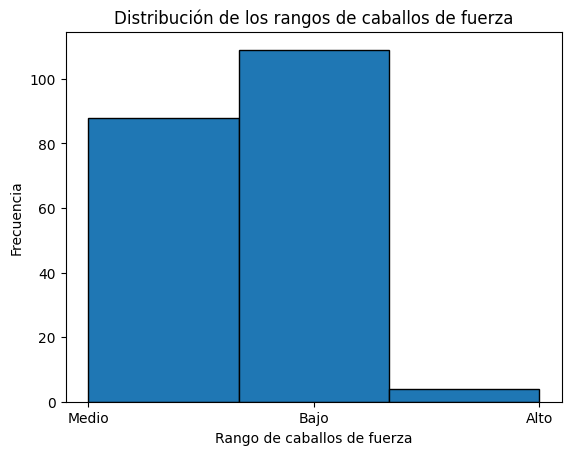

In [ ]:
# Crear la nueva columna con los bins usando .loc para evitar el SettingWithCopyWarning
df.loc[:, "rango-caballos-de-fuerza"] = pd.cut(df["caballos-de-fuerza"], bins=bins, labels=etiquetas)

# Convertir la columna "rango-caballos-de-fuerza" a tipo categoría
df["rango-caballos-de-fuerza"] = df["rango-caballos-de-fuerza"].astype("category")

# Verificar los primeros valores de la nueva columna
print(df[["caballos-de-fuerza", "rango-caballos-de-fuerza"]].head())

# Crear el histograma de la columna "rango-caballos-de-fuerza"
plt.hist(df["rango-caballos-de-fuerza"], bins=len(etiquetas), edgecolor='black')

# Configurar las etiquetas de los ejes y el título del gráfico
plt.xlabel("Rango de caballos de fuerza")
plt.ylabel("Frecuencia")
plt.title("Distribución de los rangos de caballos de fuerza")

# Mostrar el gráfico
plt.show()


In [ ]:
# Encuentra los valores mínimo y máximo de "caballos-de-fuerza"
valor_inicial = min(df["caballos-de-fuerza"])
valor_final = max(df["caballos-de-fuerza"])

# Utiliza np.linspace para generar 4 divisores igualmente espaciados para 3 bins
bins = np.linspace(valor_inicial, valor_final, 4)

bins

array([ 48.        , 119.33333333, 190.66666667, 262.        ])

In [ ]:
# Usamos el arreglo de bins generado previamente
# El arreglo de bins contiene los límites de cada intervalo

# Generamos las etiquetas para cada bin
etiquetas = ['Bajo', 'Medio', 'Alto']

# Asignamos los valores de los bins a la columna "rango-caballos-de-fuerza"
df["rango-caballos-de-fuerza"] = pd.cut(df["caballos-de-fuerza"], bins=bins, labels=etiquetas)

# Verificamos los primeros valores de la nueva columna
df[["caballos-de-fuerza", "rango-caballos-de-fuerza"]].head()

,caballos-de-fuerza,rango-caballos-de-fuerza
0,111.0,Bajo
1,111.0,Bajo
2,154.0,Medio
3,102.0,Bajo
4,115.0,Bajo


In [ ]:
# Aplicar la función 'cut' para asignar los valores de 'caballos-de-fuerza' a los bins con las etiquetas definidas
df["rango-caballos-de-fuerza"] = pd.cut(df["caballos-de-fuerza"], bins=bins, labels=etiquetas)

# Verificar los primeros valores de la nueva columna
df[["caballos-de-fuerza", "rango-caballos-de-fuerza"]].head()


,caballos-de-fuerza,rango-caballos-de-fuerza
0,111.0,Bajo
1,111.0,Bajo
2,154.0,Medio
3,102.0,Bajo
4,115.0,Bajo


In [ ]:
# Ver el número de vehículos en cada bin (grupo)
df["rango-caballos-de-fuerza"].value_counts()

,count
rango-caballos-de-fuerza,
Bajo,152
Medio,43
Alto,5


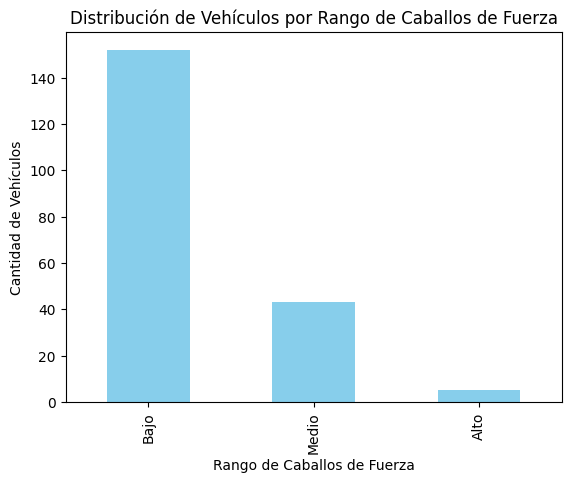

In [ ]:
# Graficar la distribución de cada bin
import matplotlib.pyplot as plt

# Crear histograma de los valores de "rango-caballos-de-fuerza"
df["rango-caballos-de-fuerza"].value_counts().sort_index().plot(kind="bar", color="skyblue")

# Configurar etiquetas y título del gráfico
plt.xlabel("Rango de Caballos de Fuerza")
plt.ylabel("Cantidad de Vehículos")
plt.title("Distribución de Vehículos por Rango de Caballos de Fuerza")

# Mostrar el gráfico
plt.show()

**¡Excelente trabajo!**

Has logrado reducir el rango de valores de la columna "caballos-de-fuerza" de 59 posibles valores a solo 3 categorías: "Bajo", "Medio", y "Alto".

Este proceso de **binned** data o **binning** ha sido útil para simplificar y categorizar los datos de una manera que te permite enfocarte en los rangos de los caballos de fuerza de los vehículos, sin preocuparte por los valores individuales.

Al dividir los datos en estos 3 bins, has hecho un análisis mucho más sencillo y te será más fácil comparar el precio o el rendimiento de los vehículos según estas categorías amplias de caballos de fuerza.

## **Visualizacion**

Para visualizar la distribución de los bins que creamos, el histograma es una herramienta excelente. Los histogramas muestran la frecuencia de los valores dentro de cada bin, y al usar el método cut, podemos ver cómo se distribuyen las categorías de "caballos de fuerza" en cada uno de esos rangos.

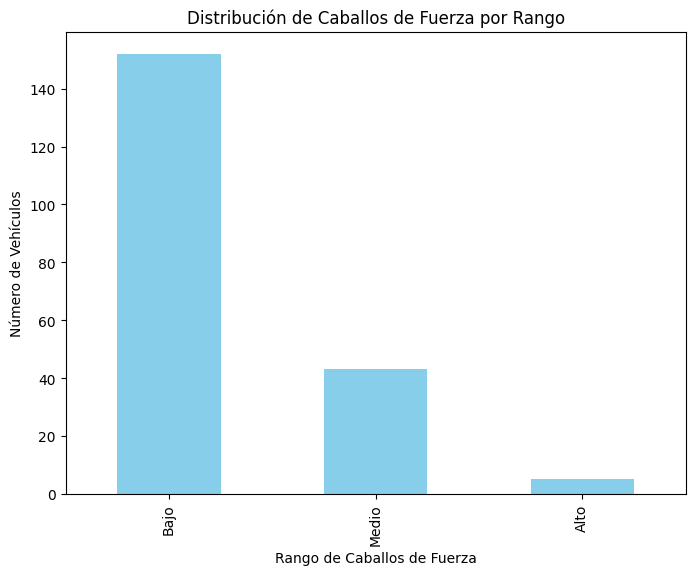

In [ ]:
# Graficamos el histograma de los "bins" creados
plt.figure(figsize=(8, 6))
df['rango-caballos-de-fuerza'].value_counts().plot(kind='bar', color='skyblue')

# Añadimos etiquetas y título
plt.xlabel('Rango de Caballos de Fuerza')
plt.ylabel('Número de Vehículos')
plt.title('Distribución de Caballos de Fuerza por Rango')

# Mostramos el gráfico
plt.show()

### ¿Qué es una variable indicadora?

Una **variable indicadora** (también conocida como **variable ficticia** o **dummy variable**) es una variable numérica utilizada para etiquetar categorías. Se llaman "dummy" porque los números mismos no tienen un significado inherente, solo se usan para representar la presencia o ausencia de una categoría.

### ¿Por qué usar variables indicadoras?

Se utilizan variables indicadoras para poder incluir variables categóricas en análisis de regresión y otros modelos estadísticos que solo entienden números y no texto. Esto es útil cuando se tienen características como "gas" o "diésel" en una columna y necesitas transformarlas en números para que puedan ser utilizadas en modelos como la regresión.

### Ejemplo

Imagina que tienes una columna llamada **"tipo-de-combustible"** que tiene dos valores únicos: **"gas"** o **"diésel"**. Los modelos de regresión no entienden palabras, solo números. Para usar esta variable en un análisis de regresión, puedes convertirla en variables indicadoras, asignando un valor de 0 o 1 a cada categoría.

Por ejemplo:

- **"gas"** podría convertirse en **1**
- **"diésel"** podría convertirse en **0**

Así, podrías usar estos valores numéricos en lugar de los valores de texto.

Este proceso convierte la variable categórica en una forma adecuada para su análisis en modelos de regresión y otros algoritmos de machine learning.


In [ ]:
# Utilizamos el método get_dummies para crear variables indicadoras
df_tipo_combustible = pd.get_dummies(df['tipo-de-combustible'])

# Mostramos el DataFrame con las nuevas columnas
df = pd.concat([df, df_tipo_combustible], axis=1)

# Verificamos los primeros registros
df.head()

,simbolismo,pérdidas-normalizadas,marca,tipo-de-combustible,aspiración,número-de-puertas,estilo-de-carrocería,ruedas-motrices,ubicación-del-motor,distancia-entre-ejes,...,recorrido,relación-de-compresión,caballos-de-fuerza,rpm-pico,mpg-ciudad,carretera-L/100km,precio,rango-caballos-de-fuerza,diesel,gas
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,2.68,9.0,111.0,5000.0,11.190476,8.703704,13495.0,Bajo,False,True
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,2.68,9.0,111.0,5000.0,11.190476,8.703704,16500.0,Bajo,False,True
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,3.47,9.0,154.0,5000.0,12.368421,9.038462,16500.0,Medio,False,True
3,2,164.0,audi,gas,std,nuevo_valor,sedan,fwd,front,99.8,...,3.40,10.0,102.0,5500.0,9.791667,7.833333,13950.0,Bajo,False,True
4,2,164.0,audi,gas,std,nuevo_valor,sedan,4wd,front,99.4,...,3.40,8.0,115.0,5500.0,13.055556,10.681818,17450.0,Bajo,False,True


In [ ]:
# Obtenemos las variables indicadoras utilizando get_dummies
dummy_variable_1 = pd.get_dummies(df['tipo-de-combustible'], prefix='combustible')

# Verificamos los primeros registros de las variables indicadoras
dummy_variable_1.head()

,combustible_diesel,combustible_gas
0,False,True
1,False,True
2,False,True
3,False,True
4,False,True


En el DataFrame, después de aplicar la transformación con `get_dummies()`, la columna original "fuel-type" se ha desglosado en dos columnas indicadoras, `combustible_gas` y `combustible_diesel`. Estas columnas contienen valores binarios (0 o 1), donde:

1 indica que el vehículo tiene el tipo de combustible correspondiente.

0 indica que el vehículo no tiene ese tipo de combustible.

Para crear una variable indicadora para la columna "aspiración", podemos seguir un proceso similar al usado para "fuel-type"

In [ ]:
# Crear las variables indicadoras para la columna 'aspiración' y asignarlas al DataFrame "dummy_variable_2"
dummy_variable_2 = pd.get_dummies(df['aspiración'])

# Cambiar los nombres de las columnas para mayor claridad
dummy_variable_2.rename(columns={'std': 'aspiración-estándar', 'turbo': 'aspiración-turbo'}, inplace=True)

# Mostrar las primeras 5 instancias del DataFrame "dummy_variable_2"
dummy_variable_2.head()


,aspiración-estándar,aspiración-turbo
0,True,False
1,True,False
2,True,False
3,True,False
4,True,False


In [ ]:
# Combinar el nuevo DataFrame con el DataFrame original
df = pd.concat([df, dummy_variable_2], axis=1)

# Eliminar la columna original "aspiración" del DataFrame
df.drop('aspiración', axis = 1, inplace=True)

In [ ]:
# Guardar el DataFrame modificado como un archivo CSV
df.to_csv("datos_transformados.csv", index=False)

In [ ]:
# Guardar el nuevo dataframe en un archivo CSV
df.to_csv('/tmp/auto_data_transformado.csv', index=False)

# Proporcionar un enlace de descarga
from google.colab import files
files.download('/tmp/auto_data_transformado.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>